In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20192.ai3eng/master/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

In [2]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="lab_02.02" )
init.get_weblink()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from local.lib import mlutils
from IPython.display import Image
%matplotlib inline

# A machine learning task

We have two species of bugs (**X bugs** and **Z bugs**), for each bug we have measured its **width** and **length**. Once we have a bug, determining if is of  **species X** or **species Z** is very costly (lab analysis, etc.)

**Machine learning goal**: We want to create a model so that, when given the width and length of a bug, will tell us whether it belongs to  **species X** or **species Z**. If the model performs well, we might use it insted of the lab analysis.

**To train a machine learning model** we are build a **training dataset** where we have **annotated** 20 bugs with their **confirmed** species. The training dataset has:

- 20 data items
- two data columns (**width** and **length**)
- one label column, with two unique values: **0 for species X**, and **1 for species Z**.

Observe that:

- For simulation purposes we create a dataset by random sampling.
- The dataset is stored in a file named `train_data.csv` in the notebooks running environment.
- If the notebook environment is destroyed, a new **different** dataset will be created.
- In **Google Colab** you can find this file under the local resources as shown. Download the `train_data.csv` file by right clicking on it

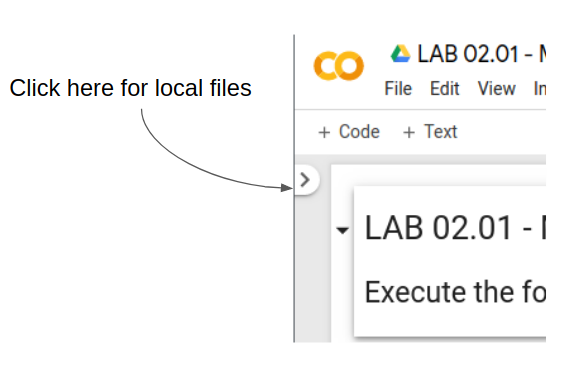

In [9]:
Image("local/imgs/colab_files.png", width=300)

In [10]:
# KEEPOUTPUT
def create_dataset(fname, n=20):
    import os
    from sklearn.preprocessing import MinMaxScaler
    if os.path.exists(fname):
        print ("retrieving data from existing '%s'"%fname)
        d = pd.read_csv(fname)
        X = d.values[:,:2]
        y = d.values[:,2]
    else:
        print ("creating new dataset and storing it into '%s'"%fname)
        X, y = make_moons(n, noise=.2)
        X = np.round(MinMaxScaler().fit_transform(X),2)
        d = pd.DataFrame(np.hstack((X,y.reshape(-1,1))), columns=["width", "length", "label"])
        d.to_csv(fname, index=False)

    print ("\ndataset size", d.shape)
    return d, X, y

d, X, y = create_dataset('train_data.csv', n=20)

retrieving data from existing 'train_data.csv'

dataset size (20, 3)


Since it is just two columns, we can visualize it

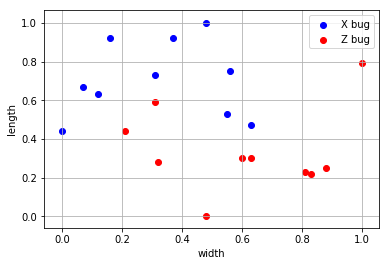

In [11]:
# KEEPOUTPUT
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue", label="X bug")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="red", label="Z bug")
plt.xlabel("width");plt.ylabel("length"); plt.legend(); plt.grid();

# Task 1. Create a model for this dataset in MS Azure ML Studio

In [Azure ML Studio](https://studio.azureml.net/) you can visually create machine learning workflows. Create an account for yourself and the available free capacity is enough for this course purposes. Follow this steps

### 1. Upload data

- Create a new **dataset** by uploading the `train_data.csv` file created before.

### 2. Create an experiment

With the structure as in the figure below. Some instructions:

- Your dataset will be under the **Saved Datasets** menu option. Once you drag and drop it into the canvas, you can right click on it ta access a basic visualization.
- Choose a **Two-Class Decision Forest** model from  **Machine Learning** $\rightarrow$ **Initialize Model** $\rightarrow$ **Classification**
- When clicking on any box, a left pane opens to configure it
- Configure the **Train Model** box so that the **Label column** is the column named **label** in the uploaded dataset.

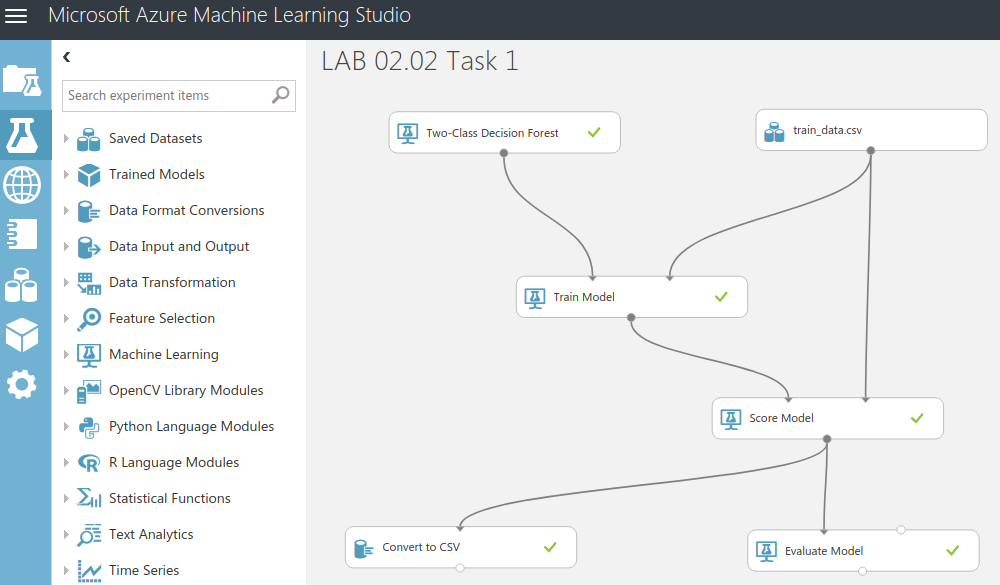

In [12]:
Image("local/imgs/azureml_create_simple_model.png", width=800)

### 3. Run the experiment

Click on the **Run** button at the bottom of the window

### 4. Inspect performance and download predictions

- Right click on **Evaluate performance** and note down the values for **accuracy**, **precision** and **recall**. Understand those metrics [here](https://en.wikipedia.org/wiki/Precision_and_recall).
- Save your model by right clicking on **Train Model**. This is **IMPORTANT!!!!**, as you will use this model later.
- Download the model scores (predictions) by right clicking on **Convert to CSV**
- Rename the downloaded file to `train_data_scores.csv`

### 5. Submit your work

- Upload the converted file to this notebook's running environment (**Google Colab**)
- Fill the the variables below with the values you previously noted down

In [13]:
t1_accuracy  = ...
t1_precision = ...
t1_recall    = ...

In [14]:
t1_train_scores = pd.read_csv("train_data_scores.csv")
t1_train_scores.shape

In [15]:
t1_train_scores

**submit your answer**

In [21]:
student.submit_task(globals(), task_id="task_01");

# Task 2. Use the model to predict on new data

We will create a dataset with a very dense set of points to understand the classification frontier generated by your model

In [22]:
# KEEPOUTPUT
d, X_test, y_test = create_dataset('test_data.csv', n=200)
d.head()

retrieving data from existing 'test_data.csv'

dataset size (200, 3)


,width,length,label
0,0.42,0.24,1.0
1,0.66,0.22,1.0
2,0.88,0.21,1.0
3,0.90,0.57,1.0
4,0.63,0.57,0.0


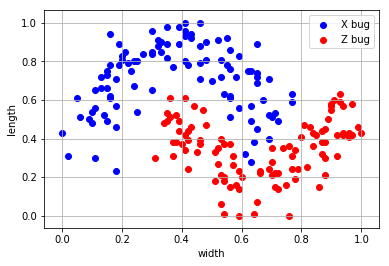

In [23]:
# KEEPOUTPUT
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="blue", label="X bug")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="red", label="Z bug")
plt.xlabel("width");plt.ylabel("length"); plt.legend(); plt.grid();

### Use the model created above to generate predictions on this data

by implementing the pipeline in the figure below. You will have to

- Note down the **accuracy**, **precision** and **recall**
- Download the predictions into a file name `test_data_scores.csv`
- Submit your work as in the previous task

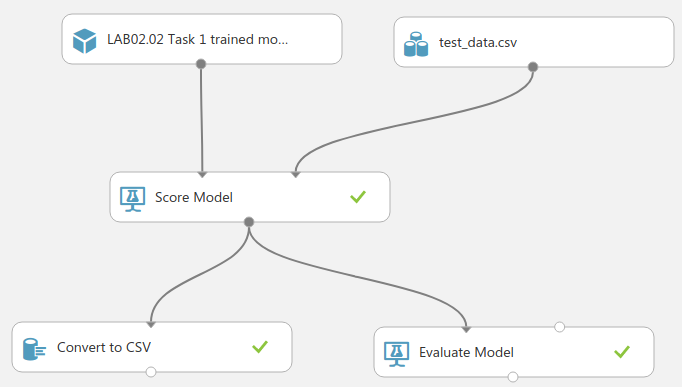

In [24]:
Image("local/imgs/azureml_apply_model.png")

**submit your work**

In [25]:
t2_accuracy  = 0.72
t2_precision = 0.75
t2_recall    = 0.66

In [26]:
t2_scores = pd.read_csv("test_data_scores.csv")
t2_scores.shape

In [27]:
t2_scores.head(5)

**submit your answer**

In [33]:
student.submit_task(globals(), task_id="task_02");


# Task 3. Classification frontier

Finally, we will get a sense of the classification frontier generated by your model. As we are not looking into *how* your model works, we will follow a blind-mode brute-force approach: we will fill the space with posible data points ans look into which ones are classifier where. Note that we can do this as we are in a small setting, but in practice this is **unfeasable** as we probably have more complex data spaces.

### 1. Create a dataset filling up the variables space

The dataset will be stored in `full_space_data.csv`. Observe that **we only have two columns** as the model will tell us the preodictions for each data point.

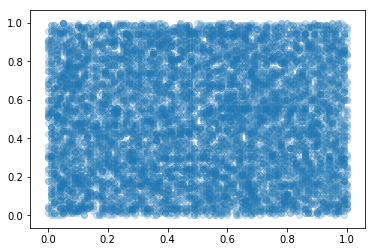

In [34]:
# KEEPOUTPUT
import os
if not os.path.exists('full_space_data.csv'):
    Xf = np.random.random(size=(10000,2)).round(2)
    plt.scatter(Xf[:,0], Xf[:,1], alpha=.5)
    pd.DataFrame(Xf, columns=["width", "length"]).to_csv("full_space_data.csv", index=False)
else:
    Xf = pd.read_csv('full_space_data.csv').values
plt.scatter(Xf[:,0], Xf[:,1], alpha=.2)

In [35]:
!head -5 full_space_data.csv

### 2. Upload the dataset to Azure and score your data

- Use the same model trained in Task 01
- Use the same experiment as in Task 02, but observe that you **cannot evaluate performance**. Why is that?
- Download the scored data into a file name `full_space_data_scores.csv`

In [36]:
t3_scores = pd.read_csv("full_space_data_scores.csv")
t3_scores.shape

In [37]:
t3_scores.head(5)

### 3. Submit your data

you do not have to fill in anything, simply execute the following cell

In [39]:
idxs = np.random.permutation(len(Xf))[:10]
t3_Xf = Xf[idxs]
t3_scoresf = t3_scores.iloc[idxs]

**submit your answer**

In [45]:
student.submit_task(globals(), task_id="task_03");

### 4. you are done!!! now observe the classification frontier

- relate the performance you obtained in the previous tasks to the plots obtained
- why is the performance so good in train and different in test?

If you used a decision forest, your frontier will look like the following one, but adjusted to your data


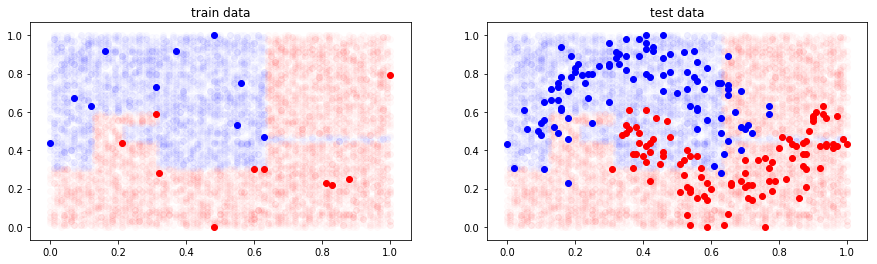

In [46]:
Image("local/imgs/classification_frontier.png")

In [47]:
Xfs = t3_scores[["width", "length"]].values
yfs = t3_scores["Scored Labels"]

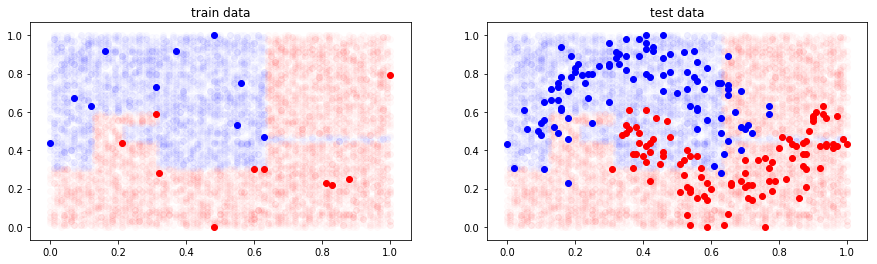

In [48]:
# KEEPOUTPUT
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("train data")
plt.scatter(Xfs[yfs==0][:,0], Xfs[yfs==0][:,1], color="blue", alpha=.02)
plt.scatter(Xfs[yfs==1][:,0], Xfs[yfs==1][:,1], color="red", alpha=.02)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="blue")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="red")
plt.subplot(122)
plt.title("test data")
plt.scatter(Xfs[yfs==0][:,0], Xfs[yfs==0][:,1], color="blue", alpha=.02)
plt.scatter(Xfs[yfs==1][:,0], Xfs[yfs==1][:,1], color="red", alpha=.02)
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="blue")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="red")

